In [1]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import pandas as pd

In [2]:
print(pd.__version__)

0.20.1


In [3]:
pd.__version__[0:3]

'0.2'

In [12]:
# pip install pandas_datareader
# pip install fbprophet

import pandas_datareader.data as web
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

from matplotlib import font_manager, rc
path = "/Users/s0wnd/Library/Fonts/D2Coding.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font_name)

plt.rcParams['axes.unicode_minus'] = False

In [13]:
start = datetime(1990, 1, 1)
end = datetime(2017, 6, 30)
# 구글에서 주식 정보 가져오기 : http://pinkwink.kr/963
KIA = web.DataReader('KRX:000270', 'google', start, end) # 기아자동차
KIA.head()

,Open,High,Low,Close,Volume
Date,,,,,
2003-01-02,9000.0,9200.0,8950.0,9190.0,688980
2003-01-03,9350.0,9720.0,9330.0,9550.0,1419855
2003-01-06,9720.0,9760.0,9500.0,9700.0,1076373
2003-01-07,9900.0,9920.0,9420.0,9420.0,1034182
2003-01-08,9500.0,9740.0,9400.0,9520.0,599806


In [14]:
KIA_trunc = KIA[:'2017-07-31']
KIA_trunc

,Open,High,Low,Close,Volume
Date,,,,,
2003-01-02,9000.0,9200.0,8950.0,9190.0,688980
2003-01-03,9350.0,9720.0,9330.0,9550.0,1419855
2003-01-06,9720.0,9760.0,9500.0,9700.0,1076373
2003-01-07,9900.0,9920.0,9420.0,9420.0,1034182
2003-01-08,9500.0,9740.0,9400.0,9520.0,599806
2003-01-09,9400.0,9440.0,8940.0,8940.0,1358610
2003-01-10,9050.0,9150.0,8300.0,8470.0,2584582
2003-01-13,8500.0,8670.0,8160.0,8650.0,1125177
2003-01-14,8630.0,8750.0,8450.0,8540.0,1095942


In [16]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2003-01-02,9190.0
1,2003-01-03,9550.0
2,2003-01-06,9700.0
3,2003-01-07,9420.0
4,2003-01-08,9520.0


In [17]:
m = Prophet()
m.fit(df)

In [18]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3951,2018-06-26
3952,2018-06-27
3953,2018-06-28
3954,2018-06-29
3955,2018-06-30


In [19]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3951,2018-06-26,31078.161861,22120.730585,40653.948435
3952,2018-06-27,31001.880762,21960.514767,40138.804964
3953,2018-06-28,30911.855241,22124.297265,40668.263193
3954,2018-06-29,30800.783804,21855.479931,40566.229822
3955,2018-06-30,31182.470635,21985.201517,40880.709908


In [20]:
forecast

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,2003-01-02,0.000000,8473.183514,-579.110976,-579.110976,8473.183514,8473.183514,3818.406328,11992.047173,-109.057328,-109.057328,-109.057328,-470.053648,-470.053648,-470.053648,-579.110976,7894.072538
1,2003-01-03,0.000189,8476.760025,-633.344604,-633.344604,8476.760025,8476.760025,3898.829052,11822.026294,-156.985894,-156.985894,-156.985894,-476.358710,-476.358710,-476.358710,-633.344604,7843.415422
2,2003-01-06,0.000756,8487.489559,-659.833671,-659.833671,8487.489559,8487.489559,3948.330058,11660.179393,-145.638292,-145.638292,-145.638292,-514.195379,-514.195379,-514.195379,-659.833671,7827.655888
3,2003-01-07,0.000945,8491.066070,-610.008587,-610.008587,8491.066070,8491.066070,4145.748781,11634.625025,-74.325223,-74.325223,-74.325223,-535.683364,-535.683364,-535.683364,-610.008587,7881.057483
4,2003-01-08,0.001134,8494.642581,-646.956215,-646.956215,8494.642581,8494.642581,3664.866107,11518.327348,-84.189228,-84.189228,-84.189228,-562.766987,-562.766987,-562.766987,-646.956215,7847.686366
5,2003-01-09,0.001323,8498.219092,-705.078985,-705.078985,8498.219092,8498.219092,3734.239617,11572.408370,-109.057328,-109.057328,-109.057328,-596.021657,-596.021657,-596.021657,-705.078985,7793.140107
6,2003-01-10,0.001511,8501.795603,-792.902520,-792.902520,8501.795603,8501.795603,3625.444613,11585.174043,-156.985894,-156.985894,-156.985894,-635.916626,-635.916626,-635.916626,-792.902520,7708.893083
7,2003-01-13,0.002078,8512.525137,-943.852019,-943.852019,8512.525137,8512.525137,3516.134143,11523.710019,-145.638292,-145.638292,-145.638292,-798.213727,-798.213727,-798.213727,-943.852019,7568.673117
8,2003-01-14,0.002267,8516.101648,-941.040281,-941.040281,8516.101648,8516.101648,3511.740039,11367.605024,-74.325223,-74.325223,-74.325223,-866.715058,-866.715058,-866.715058,-941.040281,7575.061366
9,2003-01-15,0.002456,8519.678159,-1026.315892,-1026.315892,8519.678159,8519.678159,3476.682243,11455.787293,-84.189228,-84.189228,-84.189228,-942.126664,-942.126664,-942.126664,-1026.315892,7493.362267


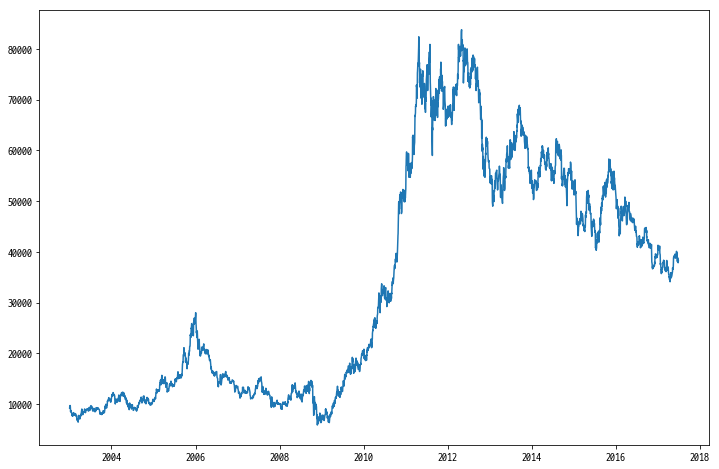

In [22]:
plt.figure(figsize=(12,8))
plt.plot(KIA['Close'])
plt.show()

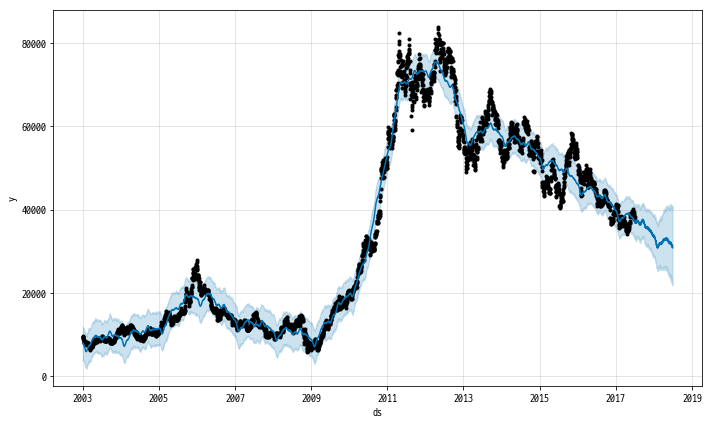

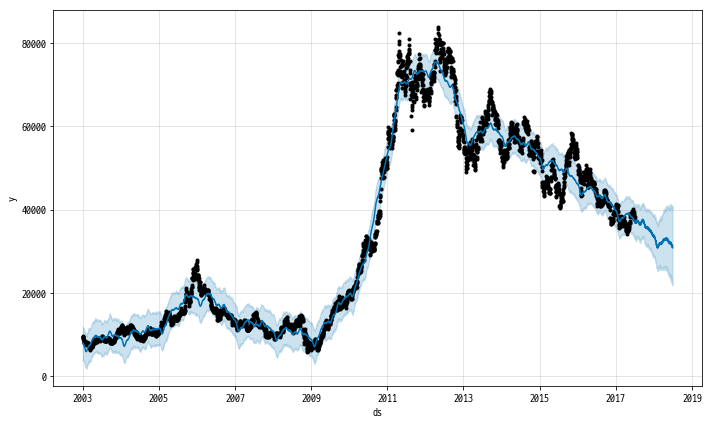

In [23]:
m.plot(forecast)

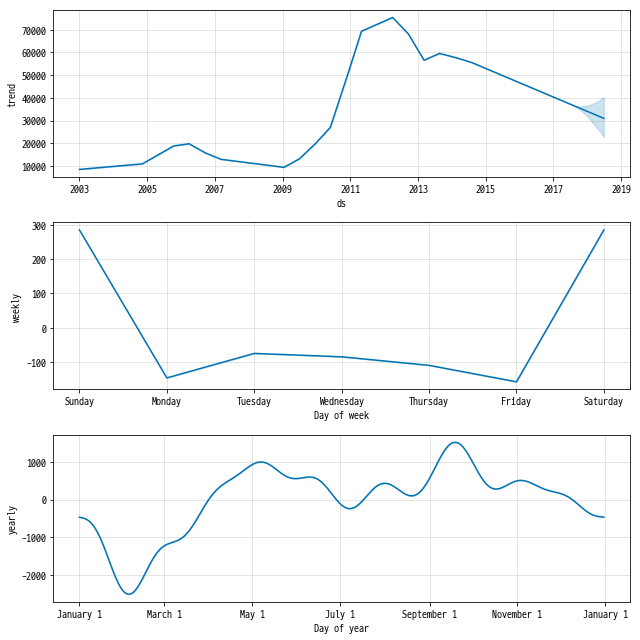

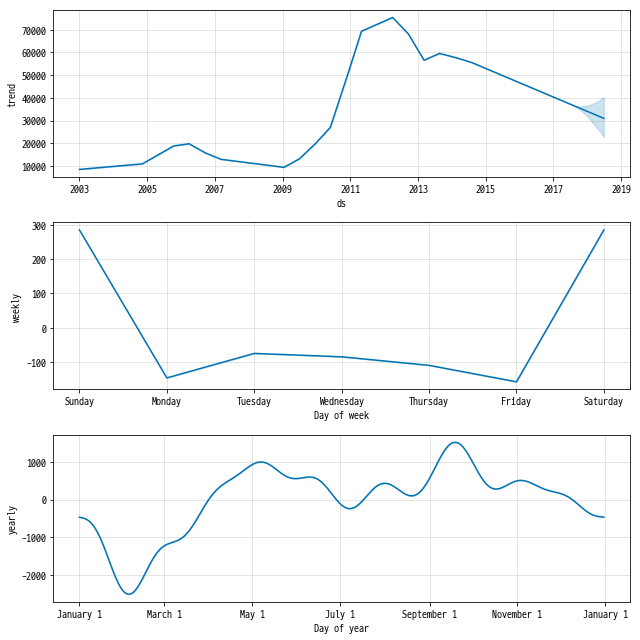

In [24]:
m.plot_components(forecast)

In [ ]:
df = pd.read_csv('')